In [5]:
teachers = pd.read_csv('../data/teachers.csv')
students = pd.read_csv('../data/students.csv')
sessions = pd.read_csv('../data/sessions.csv')
schools = pd.read_csv('../data/schools.csv')
posts = pd.read_csv('../data/posts.csv')
planning_events = pd.read_csv('../data/planning_events.csv')
child_posts = pd.read_csv('../data/child_posts.csv')
classrooms = pd.read_csv('../data/classrooms.csv')
lesson_posts = pd.read_csv('../data/lesson_posts.csv')
parents = pd.read_csv('../data/parents.csv')

## Sessions analysis

In [6]:
sessions.head()

,id,current,start_date,stop_date,name,school_id,inactive
0,1,f,2012-01-03,2012-06-20,2011-12,2,f
1,2,f,2012-06-25,2012-08-17,Summer 2012,2,f
2,6,f,2013-09-01,2014-07-01,2013-14,3,f
3,3,f,2012-09-04,2013-06-19,2012-13,2,f
4,4,f,2012-09-01,2013-06-30,2012-13,3,f


In [7]:
sessions['start_date'] = pd.to_datetime(sessions['start_date'])
sessions['stop_date'] = pd.to_datetime(sessions['stop_date'])

In [8]:
# churners:
sum(sessions.groupby('school_id')['stop_date'].max()<pd.to_datetime('april 28, 2018'))

14

In [9]:
sum(sessions['stop_date']<pd.to_datetime('april 28, 2018'))

1973

Text(0.5,1,'school_id start/stop dates')

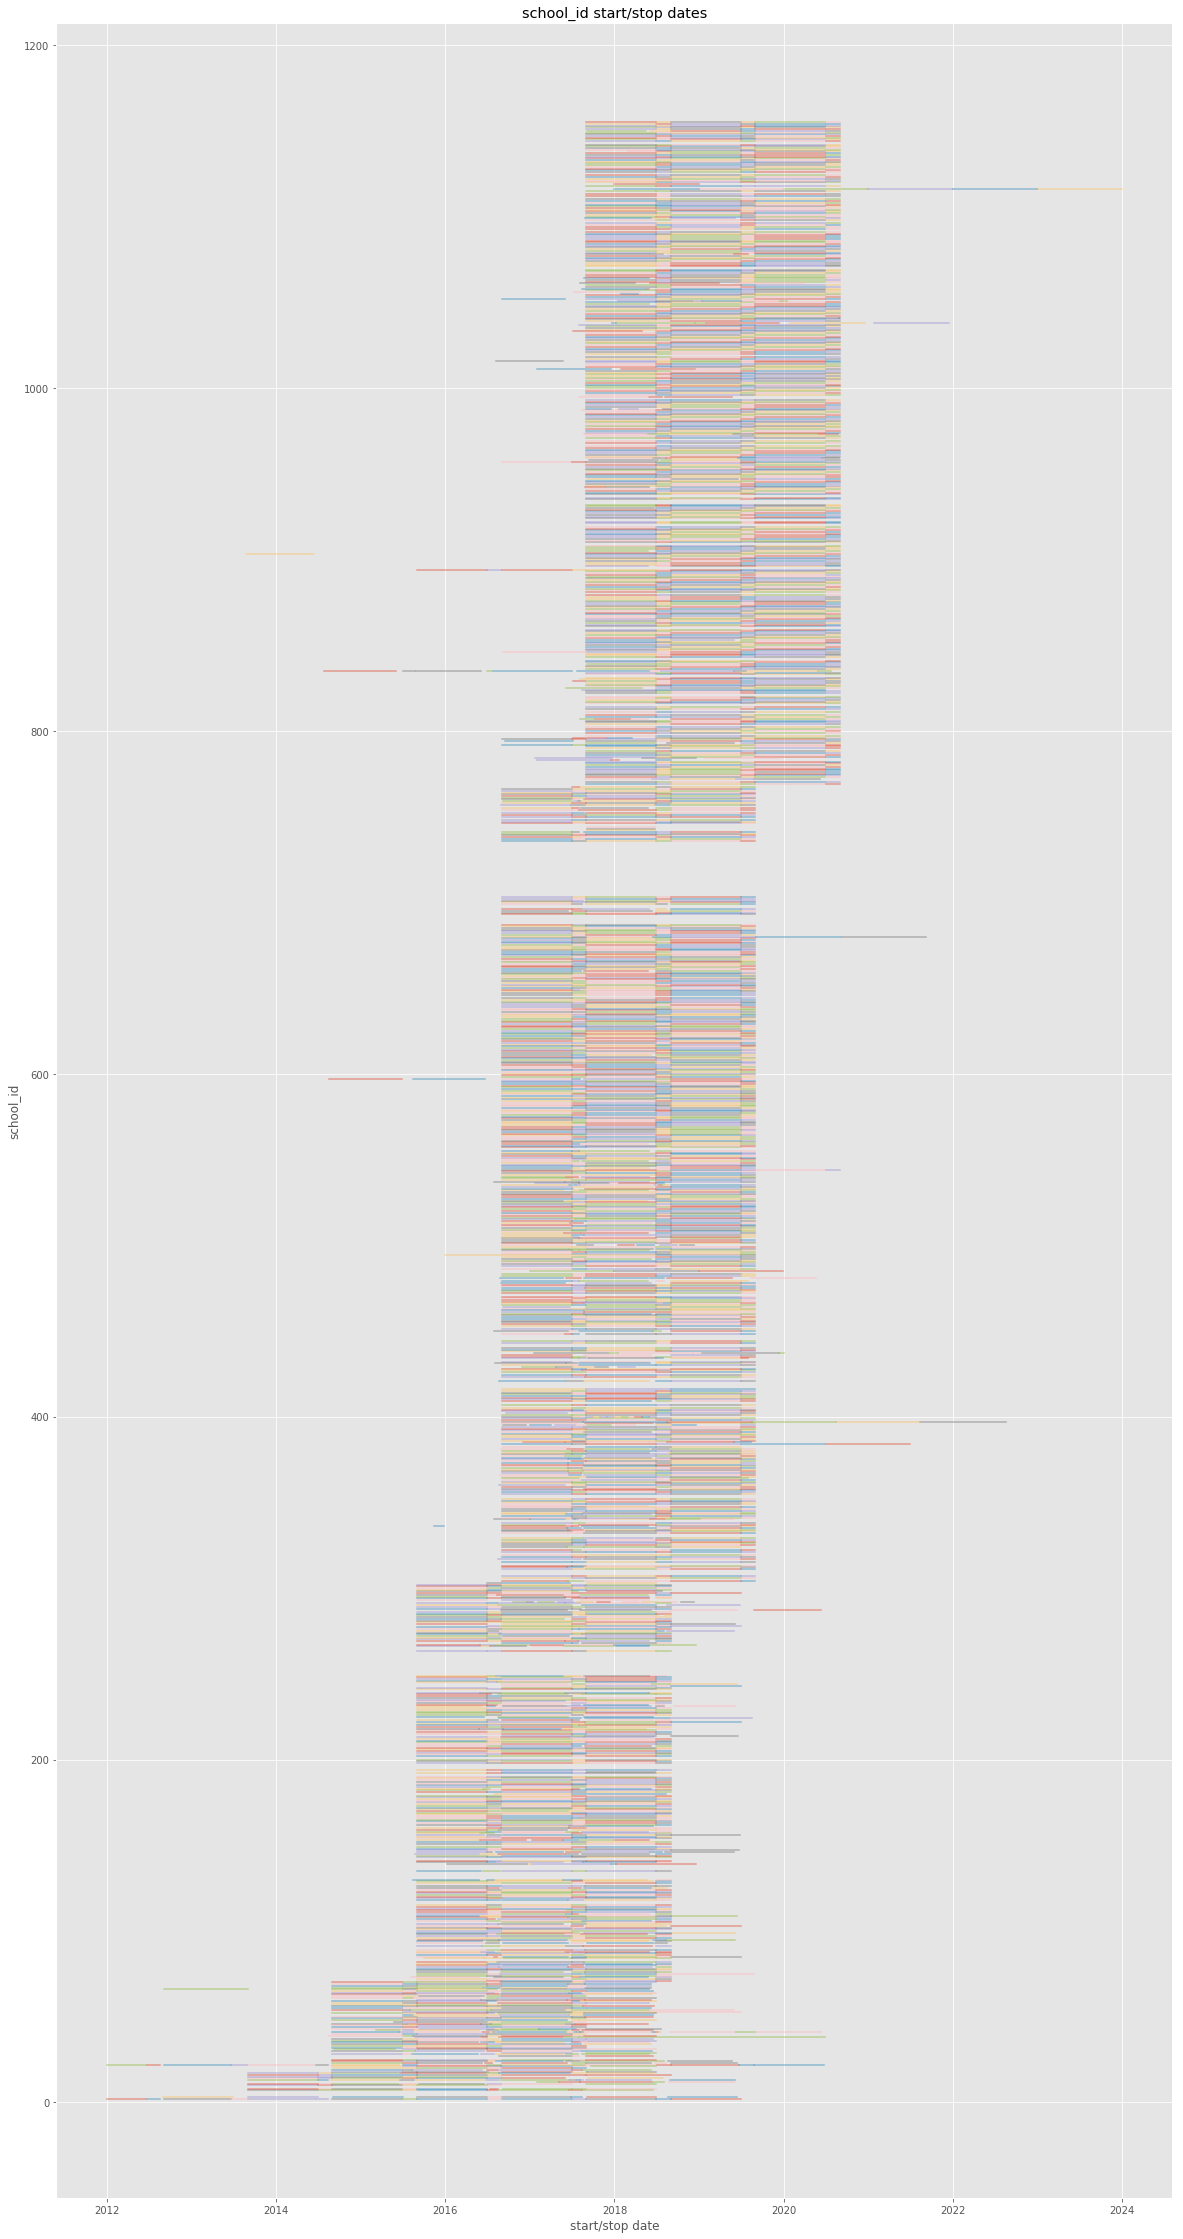

In [6]:
fig, ax = plt.subplots(1,1, figsize=(20,40))
point_pairs = [((sessions.start_date[i],sessions.stop_date[i]),(sessions.school_id[i],sessions.school_id[i])) for i in range(len(sessions))]
# point_pairs = [((sessions.start_date[i],sessions.stop_date[i]),(sessions.school_id[i],sessions.school_id[i])) for i in range(100)]
for x in point_pairs:
    ax.plot(x[0], x[1], alpha=.5)
ax.set_xlabel('start/stop date')
ax.set_ylabel('school_id')
ax.set_title('school_id start/stop dates')

In [10]:
sessions.start_date[0]

Timestamp('2012-01-03 00:00:00')

In [11]:
sessions['exists']=1

In [12]:
sessions.groupby('start_date').sum().head(5)
sum_sessions_date_indexed = sessions.groupby('start_date').sum()
sum_sessions_date_indexed['exists'] = np.log(sum_sessions_date_indexed['exists'])
sum_sessions_date_indexed[sum_sessions_date_indexed['school_id']==465]['exists']
sum_sessions = sum_sessions_date_indexed.reset_index()
sum_sessions.head()

,start_date,id,school_id,exists
0,2012-01-03,4596,24,0.693147
1,2012-06-25,4598,24,0.693147
2,2012-09-01,4,3,0.000000
3,2012-09-04,6662,90,1.098612
4,2013-06-20,4606,24,0.693147


max stop = 2023-12-31 00:00:00
max start = 2023-01-01 00:00:00
min stop = 2012-06-20 00:00:00
min start = 2012-01-03 00:00:00


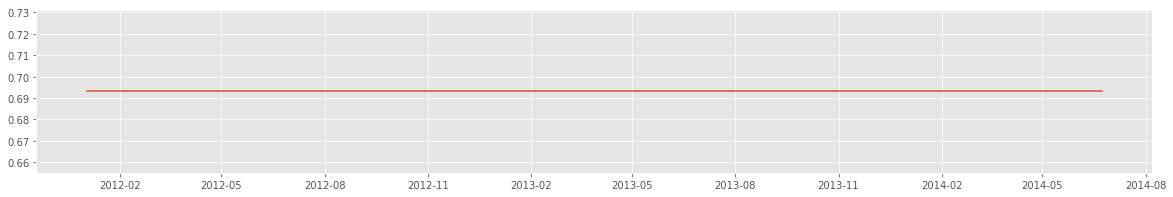

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,3))
ax.plot(sum_sessions[sum_sessions['school_id']==24]['start_date'], sum_sessions[sum_sessions['school_id']==24]['exists'])
sessions.describe()
print('max stop = ' + str(sessions.stop_date.max()))
print('max start = ' + str(sessions.start_date.max()))
print('min stop = ' + str(sessions.stop_date.min()))
print('min start = ' + str(sessions.start_date.min()))

In [11]:
sessions.head(3)

,id,current,start_date,stop_date,name,school_id,inactive,exists
0,1,f,2012-01-03,2012-06-20,2011-12,2,f,1
1,2,f,2012-06-25,2012-08-17,Summer 2012,2,f,1
2,6,f,2013-09-01,2014-07-01,2013-14,3,f,1


school_id
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
Name: exists, dtype: object

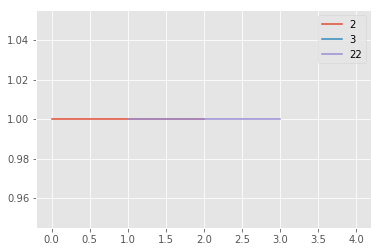

In [12]:
sessions_grouped = sessions[['start_date','school_id','exists']].groupby(['start_date','school_id']).sum().reset_index().head()
# sessions_grouped.set_index('start_date', inplace=True)
sessions_grouped.groupby('school_id')['exists'].plot(legend=True)

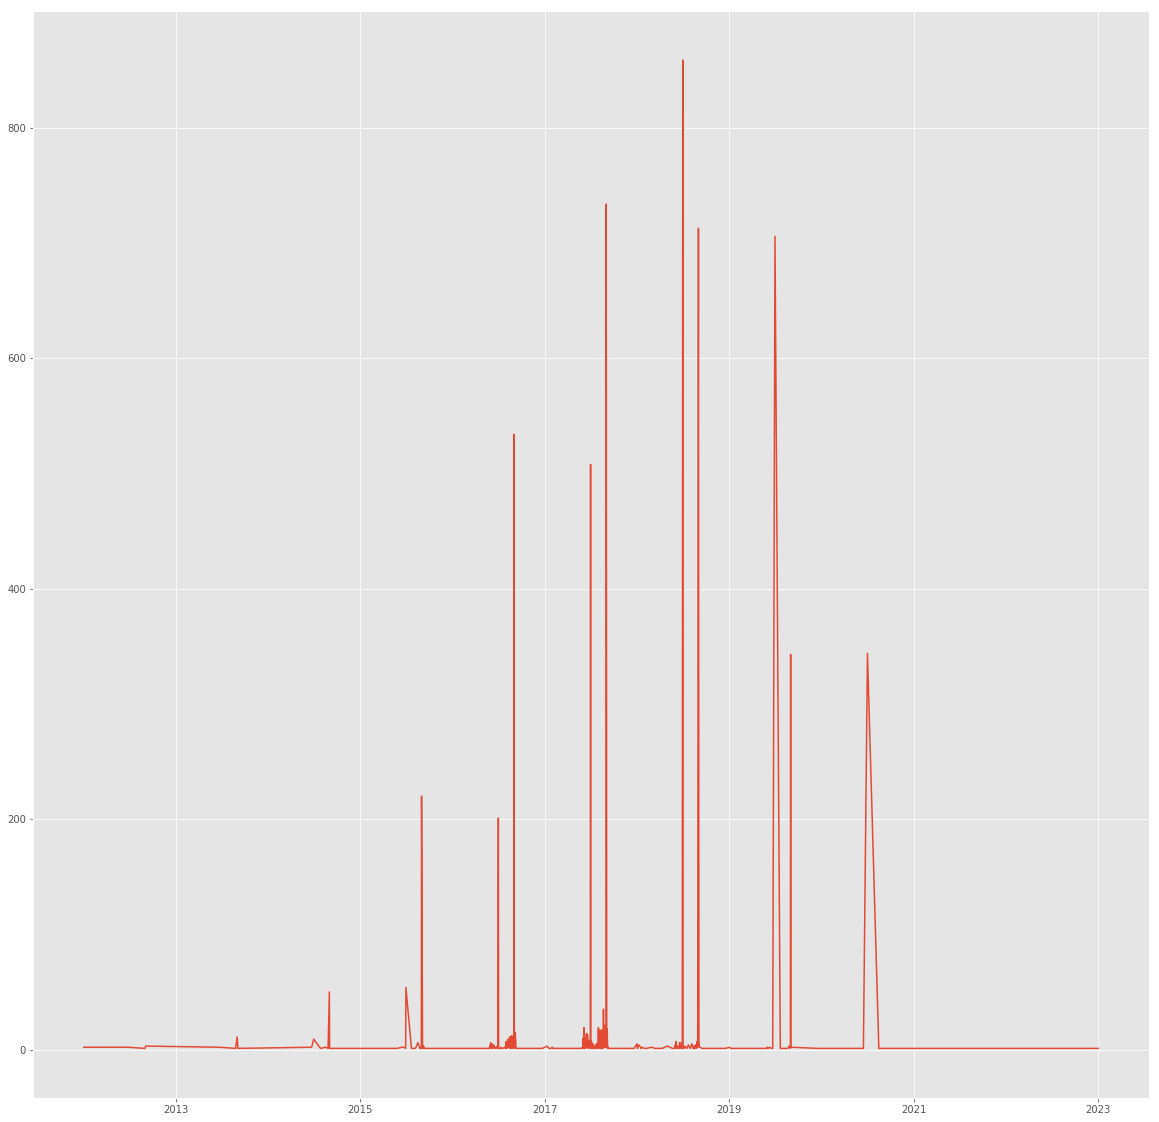

In [13]:
fig, ax = plt.subplots(1,1, figsize=(20,20))
ax.plot(sessions[['exists','start_date']].groupby('start_date').sum());

## Posts analysis

In [14]:
posts = pd.read_csv('Archive/posts.csv')

In [15]:
posts.describe()

,id,classroom_id
count,4.584013e+06,4.584013e+06
mean,2.551726e+06,1.250037e+03
std,1.469805e+06,9.544487e+02
min,6.000000e+00,1.000000e+00
25%,1.264436e+06,4.980000e+02
50%,2.567237e+06,9.850000e+02
75%,3.826450e+06,1.902000e+03
max,5.088035e+06,3.862000e+03


In [23]:
sorted_post_date = posts.date.sort_values()

In [24]:
# posts.date.dtypes
# posts.date.apply(lambda x: not isinstance(x, pd.Timestamp))
sorted_post_date.iloc[-170:]
# posts.date.dtypes
posts['new_date'] = pd.to_datetime(posts.date, errors='coerce')
# len(posts.date)
# posts.date>'2018-12-12'

In [25]:
print(posts.new_date.max())
print(posts.new_date.min())

2020-08-24 00:00:00
1908-10-09 00:00:00


In [26]:
posts['exists']=1
posts.head(3)

,id,date,classroom_id,picture_file_name,private,new_date,exists
0,4319418,2018-01-25,1684,NaN,f,2018-01-25,1
1,4319419,2018-01-25,1684,NaN,f,2018-01-25,1
2,4319420,2018-01-25,1684,NaN,f,2018-01-25,1


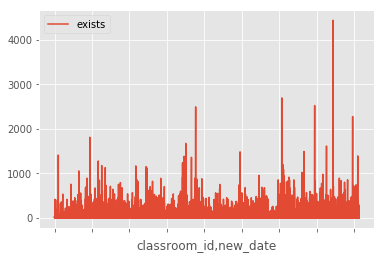

In [20]:
posts[['new_date','classroom_id','exists']].groupby(['classroom_id', 'new_date']).sum().plot();

In [21]:
posts[['new_date','classroom_id','exists']].groupby(['classroom_id', 'new_date']).sum()

exists
classroom_id new_date          
1            2011-12-25      16
             2012-01-05      25
             2012-01-06      16
             2012-01-12      16
             2012-01-13      22
             2012-01-14       9
             2012-01-17       7
             2012-01-25      17
             2012-01-26       7
             2012-01-27      43
             2012-01-30       4
             2012-01-31       1
             2012-02-01       6
             2012-02-03       4
             2012-02-04       3
             2012-02-06      33
             2012-02-07      10
             2012-02-08       5
             2012-02-09      42
             2012-02-10       7
             2012-02-11       3
             2012-02-13       9
             2012-02-14      12
             2012-02-15      10
             2012-02-16      13
             2012-02-17       2
             2012-02-21       8
             2012-02-22      19
             2012-02-23       3
             2012-02-24      13
...                         ...
3836         2018-02-20       3
             2018-02-22       1
             2018-02-28       1
             2018-03-08       1
             2018-03-09       2
             2018-03-12       4
             2018-03-13       1
             2018-03-16      39
3837         2018-03-13       5
3838         2018-03-13      85
             2018-03-14      79
             2018-03-16      66
             2018-03-17      69
3840         2018-03-12      23
3843         2017-11-21       9
             2017-11-28       6
             2017-11-29       3
             2018-01-26       5
             2018-02-15       3
             2018-02-16      12
             2018-03-13     222
             2018-03-14     146
             2018-03-15      66
3849         2018-03-15      28
             2018-03-16      23
3859         2018-03-15       5
             2018-03-16       1
3860         2018-03-15      16
             2018-03-16       2
3862         2018-03-15       1

[203159 rows x 1 columns]

In [27]:
sum_post = posts[['new_date','classroom_id','exists']].groupby(['classroom_id', 'new_date']).sum()
sum_post['exists'] = np.log(sum_post['exists'])
sum_post = sum_post.reset_index()
sum_post_date_indexed = sum_post.copy()
sum_post_date_indexed.set_index('new_date',inplace=True)
# plt.plot(sum_post[sum_post['classroom_id']==1])
# plt.scatter(sum_post[sum_post['classroom_id']==1][new_date], sum_post[sum_post['classroom_id']==1]['exists'])

In [23]:
sum_post[sum_post['classroom_id']==3]

,classroom_id,new_date,exists
1482,3,2012-10-03,0.693147
1483,3,2012-10-04,0.693147
1484,3,2016-05-13,1.386294
1485,3,2016-10-28,1.945910
1486,3,2016-11-07,2.079442
1487,3,2017-03-21,1.791759
1488,3,2017-10-16,2.708050
1489,3,2017-11-05,4.174387
1490,3,2018-01-08,1.386294


In [24]:
sum_post['classroom_id'].value_counts()[60:61]
sum_post.head()

,classroom_id,new_date,exists
0,1,2011-12-25,2.772589
1,1,2012-01-05,3.218876
2,1,2012-01-06,2.772589
3,1,2012-01-12,2.772589
4,1,2012-01-13,3.091042


In [52]:
# plt.plot(sum_post[sum_post['classroom_id']==1]);
np.exp(5)

148.4131591025766

Text(0.5,1,'Class 77 log(posts)')

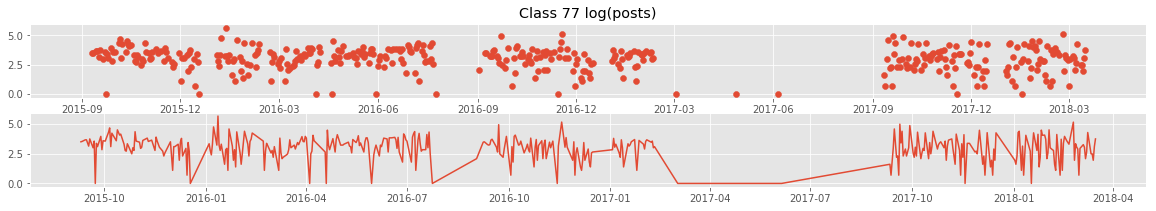

In [26]:
fig, ax = plt.subplots(2,1, figsize=(20,3))
ax[0].scatter(sum_post[sum_post['classroom_id']==77]['new_date'].values,sum_post[sum_post['classroom_id']==77]['exists'])
ax[1].plot(sum_post[sum_post['classroom_id']==77]['new_date'],sum_post[sum_post['classroom_id']==77]['exists']);
ax[0].set_title("Class 77 log(posts)")

Text(0.5,1,'Class 852 log(posts)')

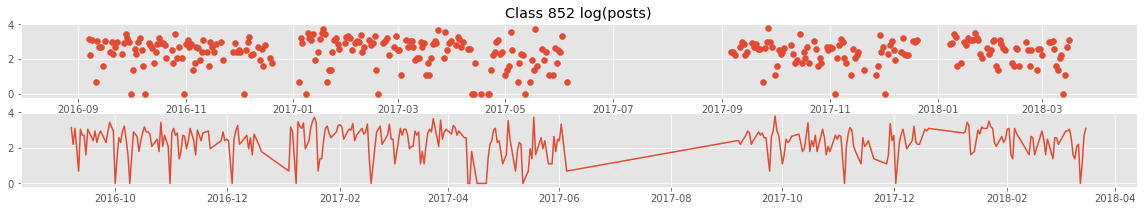

In [27]:
fig, ax = plt.subplots(2,1, figsize=(20,3))
ax[0].scatter(sum_post[sum_post['classroom_id']==852]['new_date'].values,sum_post[sum_post['classroom_id']==852]['exists'])
ax[1].plot(sum_post[sum_post['classroom_id']==852]['new_date'],sum_post[sum_post['classroom_id']==852]['exists']);
ax[0].set_title("Class 852 log(posts)")

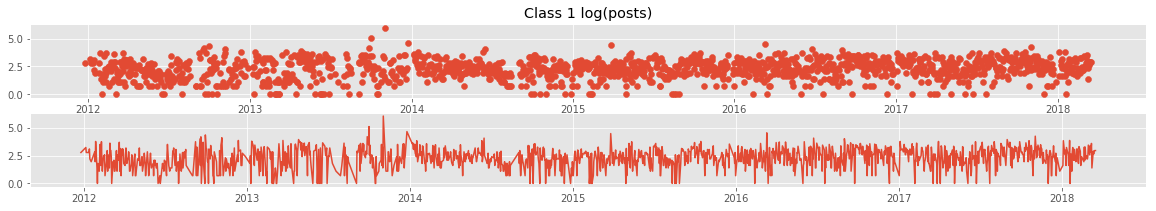

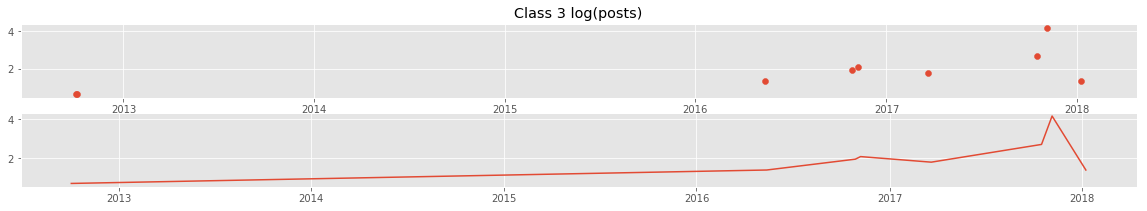

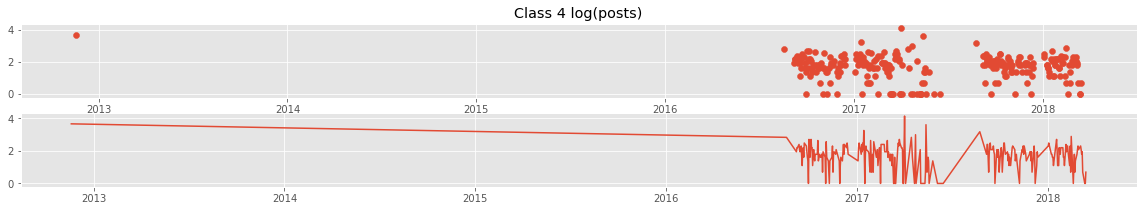

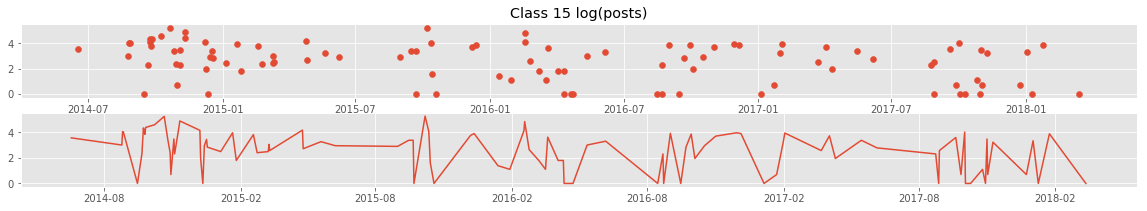

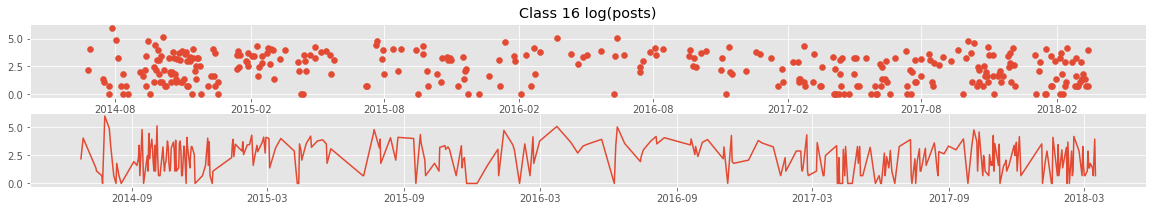

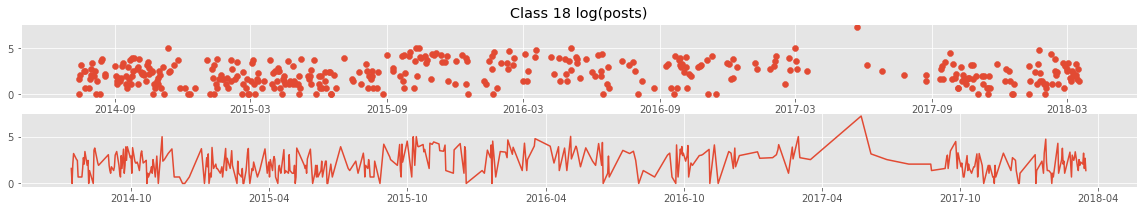

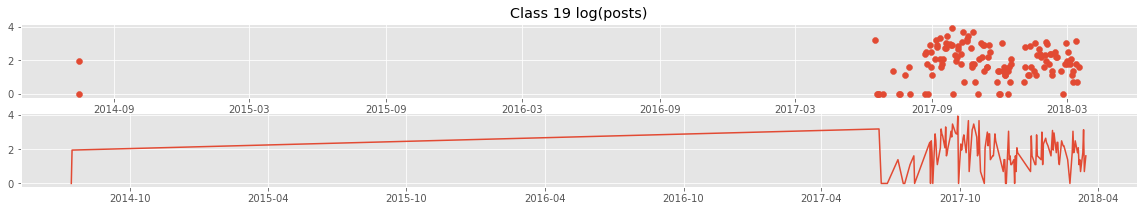

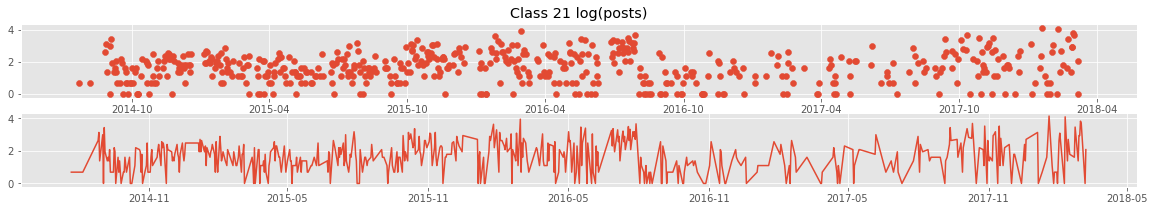

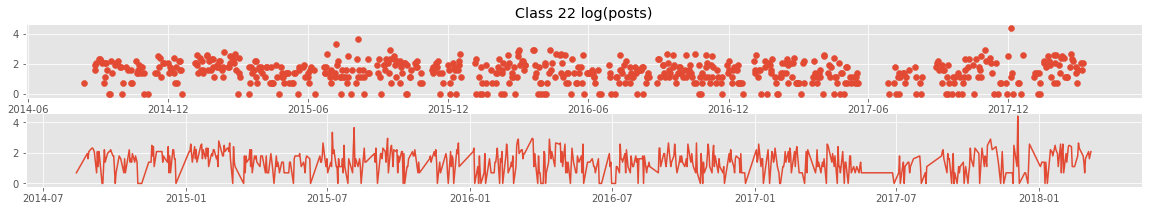

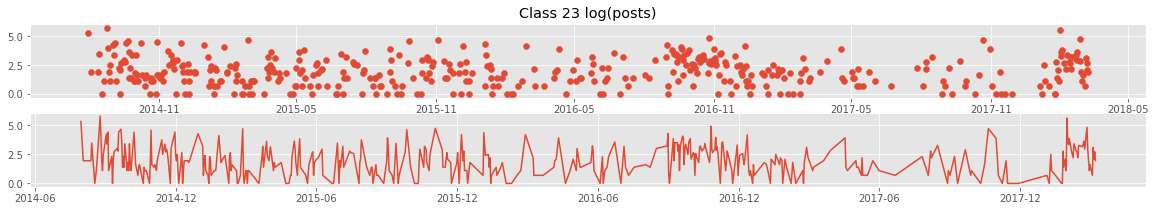

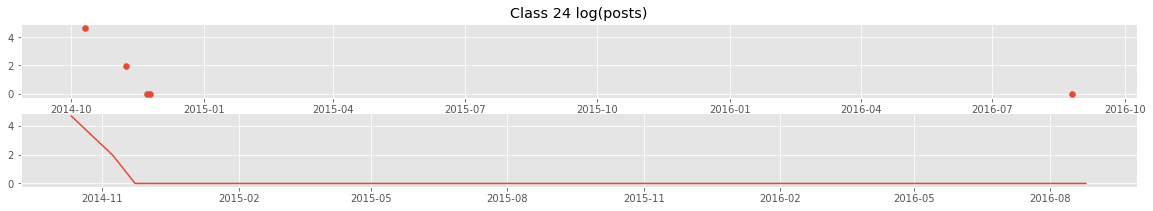

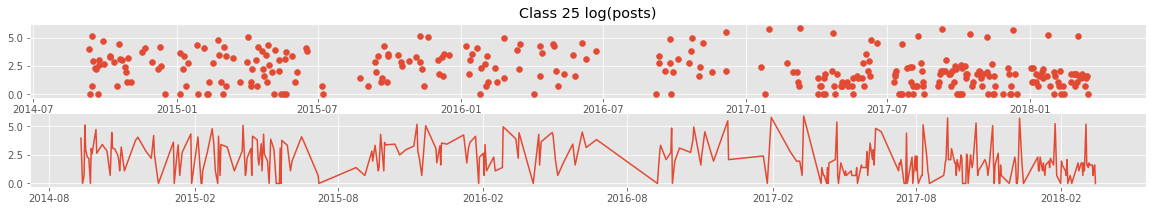

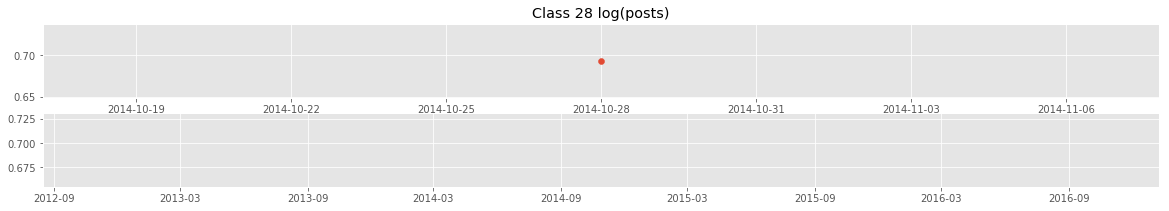

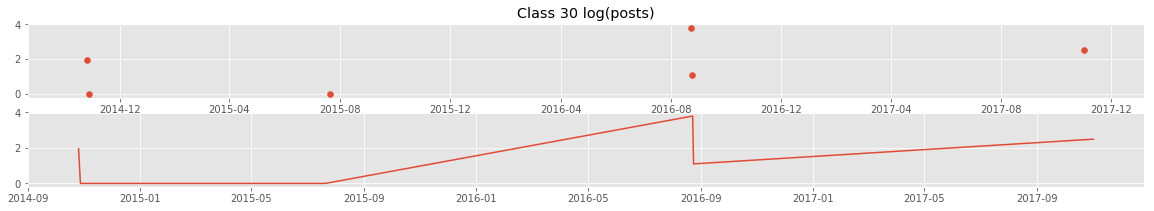

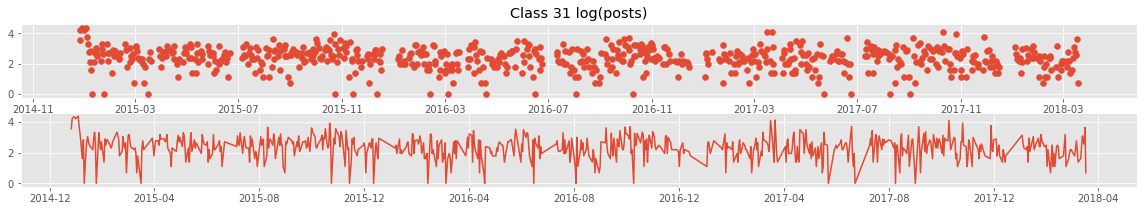

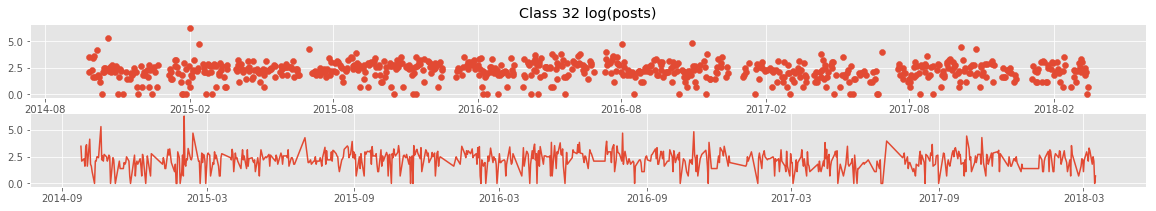

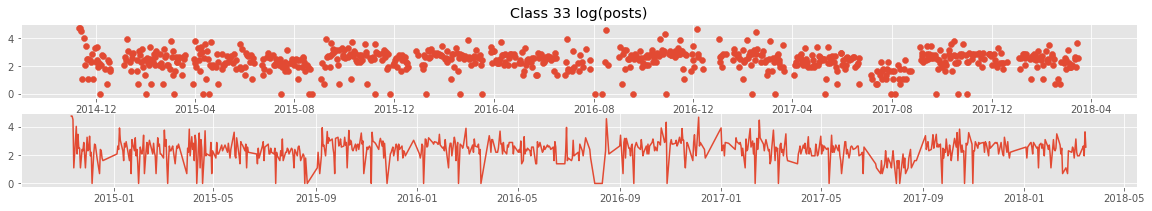

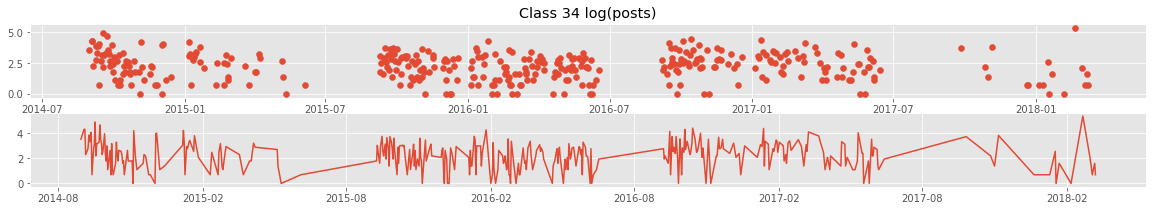

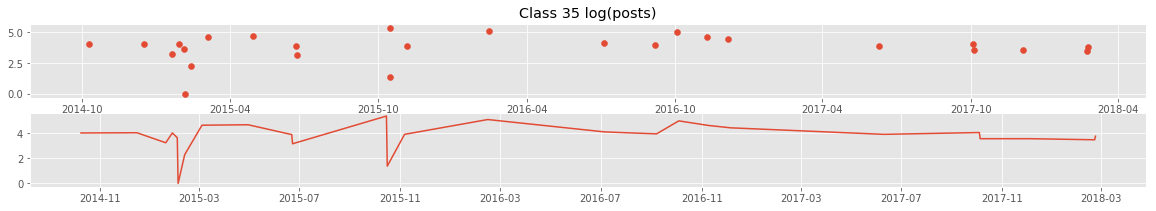

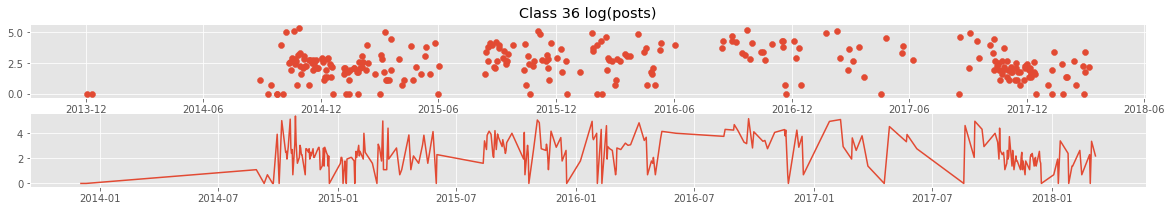

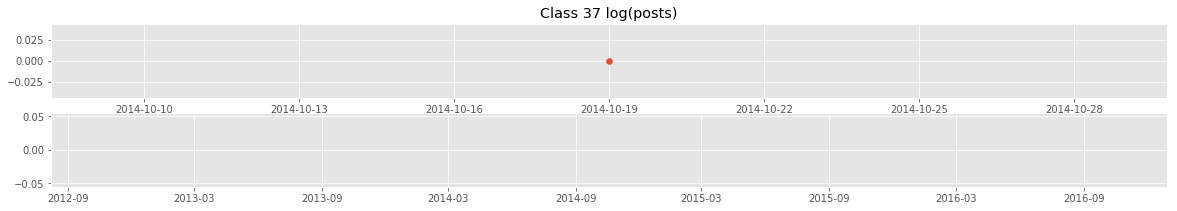

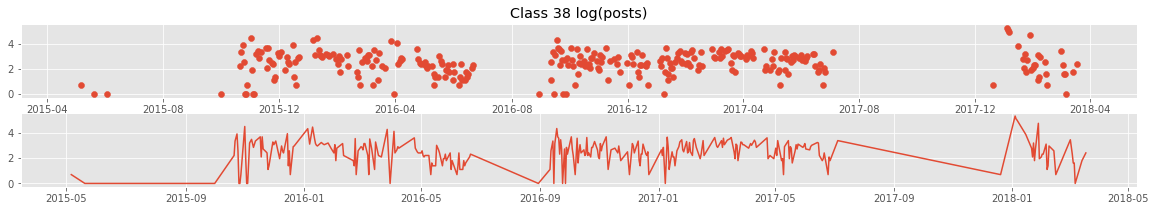

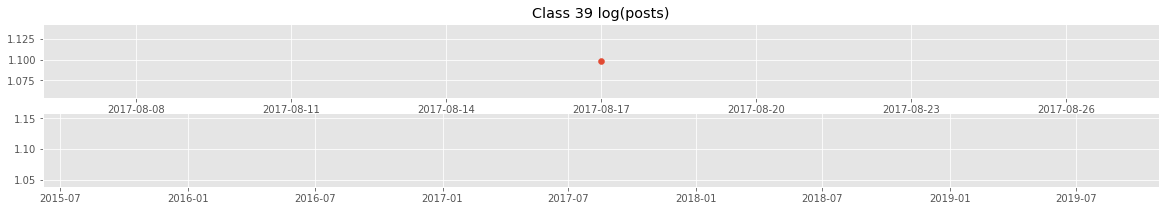

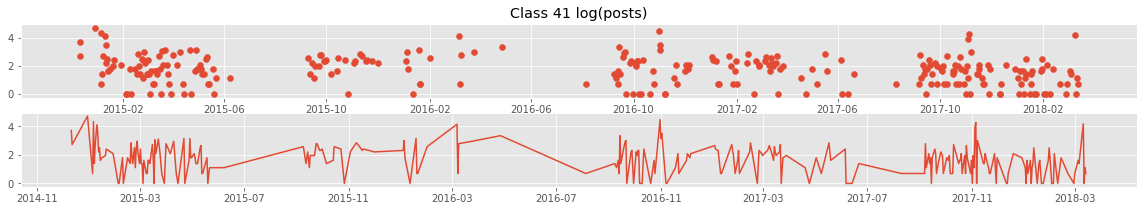

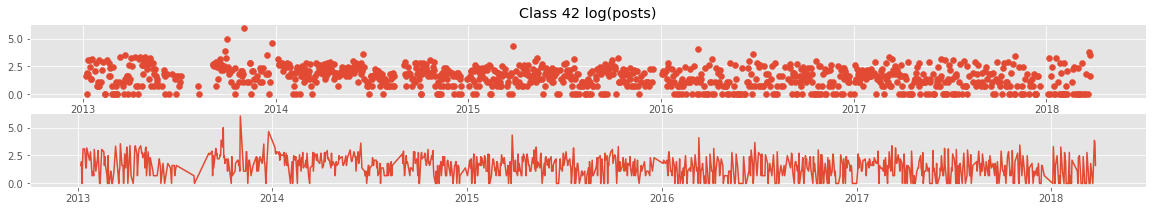

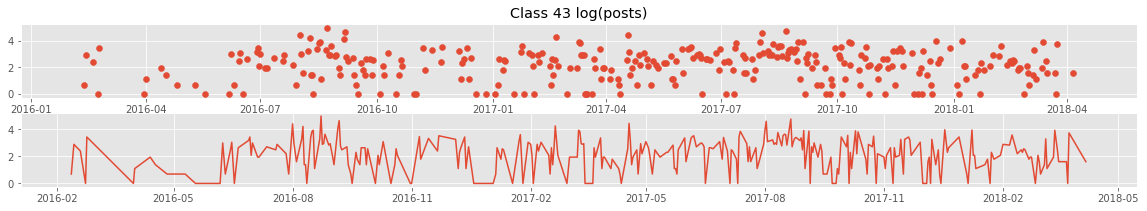

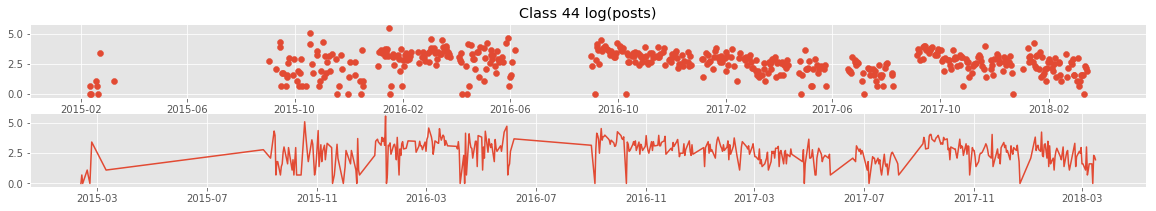

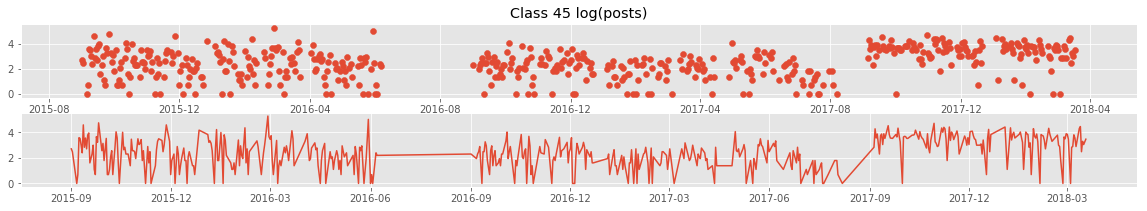

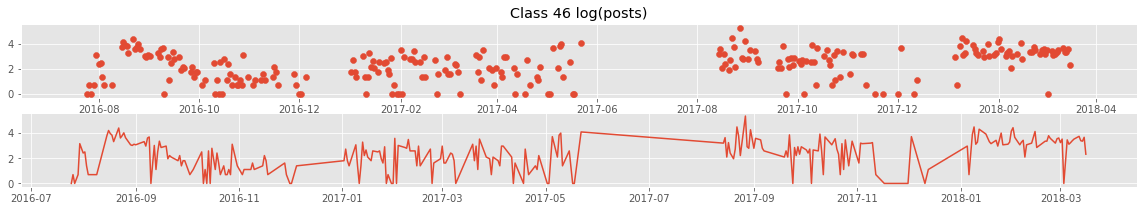

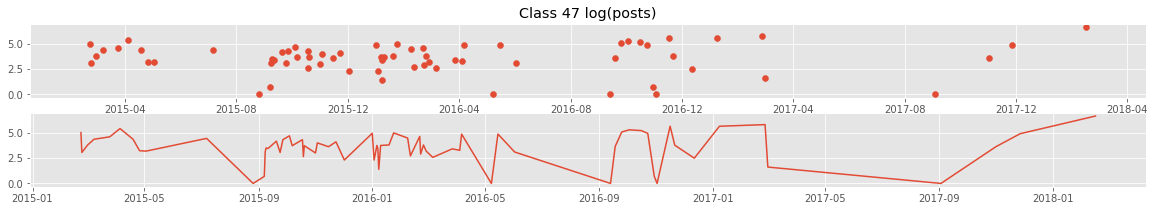

In [51]:
classroom_id = 51
for classroom_id in sum_post['classroom_id'].unique()[0:30]:
    fig, ax = plt.subplots(2,1, figsize=(20,3))
    ax[0].scatter(sum_post[sum_post['classroom_id']==classroom_id]['new_date'].values,sum_post[sum_post['classroom_id']==classroom_id]['exists'])
    ax[1].plot(sum_post[sum_post['classroom_id']==classroom_id]['new_date'],sum_post[sum_post['classroom_id']==classroom_id]['exists']);
    ax[0].set_title(f"Class {classroom_id} log(posts)")
    plt.show()

## Peek at all data:

In [75]:
posts.head()

,id,date,classroom_id,picture_file_name,private,new_date,exists
0,4319418,2018-01-25,1684,NaN,f,2018-01-25,1
1,4319419,2018-01-25,1684,NaN,f,2018-01-25,1
2,4319420,2018-01-25,1684,NaN,f,2018-01-25,1
3,4319421,2018-01-25,1684,NaN,f,2018-01-25,1
4,4319422,2018-01-25,1684,NaN,f,2018-01-25,1


In [76]:
planning_events.head(3)

,classroom_id,child_id,lesson_id,event_type,created_at,created_by_id
0,1,4,551,plan,2014-01-08 04:11:55.625921,NaN
1,1,4,544,plan,2014-01-08 04:11:55.625921,NaN
2,1,4,538,plan,2014-01-08 04:11:55.625921,NaN


In [78]:
classrooms.head(10)

,id,school_id,lesson_set_id,inactive,classroom_type
0,2650,855,1281,f,Primary
1,174,48,126,t,Primary
2,2645,862,1276,f,Lower Elementary
3,3183,968,1563,f,Infant
4,3680,224,306,f,Primary
5,256,80,162,f,Lower Elementary
6,3190,969,1566,f,Primary
7,2599,220,1253,f,Lower Elementary
8,3184,968,1563,f,Infant
9,3675,1099,1847,f,Infant


In [115]:
teachers.head(10)

,id,school_id,default_classroom_id,teacher,admin
0,830,22,42.0,t,t
1,445,14,NaN,f,t
2,48093,1121,3739.0,t,t
3,4785,70,195.0,t,f
4,67,3,4.0,f,t
5,45078,1016,3317.0,t,f
6,24578,796,2336.0,t,f
7,43116,1038,3495.0,t,t
8,26638,823,NaN,f,t
9,24166,3,34.0,t,f


In [113]:
students.head()

,child_id,classroom_id,current
0,997,72,f
1,13,1,f
2,2221,55,f
3,32489,1466,t
4,8388,60,f


In [84]:
schools.head(5)

,id
0,2
1,3
2,7
3,8
4,10


In [79]:
lesson_posts.head(3)


,lesson_id,post_id
0,17689,472955
1,17690,472955
2,17737,472955


In [77]:
child_posts.head(3)

,child_id,post_id
0,17689,472955
1,17690,472955
2,17737,472955


## Combine data into one dataframe for analysis:

In [54]:
posts = pd.read_csv('Archive/posts.csv')

In [55]:
posts.head()

,id,date,classroom_id,picture_file_name,private
0,4319418,2018-01-25,1684,NaN,f
1,4319419,2018-01-25,1684,NaN,f
2,4319420,2018-01-25,1684,NaN,f
3,4319421,2018-01-25,1684,NaN,f
4,4319422,2018-01-25,1684,NaN,f


In [56]:
posts_merge = posts.merge(classrooms,how='left', left_on='classroom_id', right_on='id')

In [57]:
posts_merge = posts_merge.merge(child_posts,how='left', left_on='id_x', right_on='post_id')

In [58]:
# posts_merge.drop('id_x', axis=1)

In [59]:
posts_merge=posts_merge.merge(lesson_posts, how='left', left_on='id_x', right_on='post_id')

In [60]:
posts_merge

,id_x,date,classroom_id,picture_file_name,private,id_y,school_id,lesson_set_id,inactive,classroom_type,child_id,post_id_x,lesson_id,post_id_y
0,4319418,2018-01-25,1684,NaN,f,1684,437,914,f,Lower Elementary,1301209.0,4319418.0,1301209.0,4319418.0
1,4319418,2018-01-25,1684,NaN,f,1684,437,914,f,Lower Elementary,1301209.0,4319418.0,1301210.0,4319418.0
2,4319418,2018-01-25,1684,NaN,f,1684,437,914,f,Lower Elementary,1301209.0,4319418.0,1301211.0,4319418.0
3,4319418,2018-01-25,1684,NaN,f,1684,437,914,f,Lower Elementary,1301209.0,4319418.0,1301212.0,4319418.0
4,4319418,2018-01-25,1684,NaN,f,1684,437,914,f,Lower Elementary,1301209.0,4319418.0,1301218.0,4319418.0
5,4319418,2018-01-25,1684,NaN,f,1684,437,914,f,Lower Elementary,1301209.0,4319418.0,38125.0,4319418.0
6,4319418,2018-01-25,1684,NaN,f,1684,437,914,f,Lower Elementary,1301210.0,4319418.0,1301209.0,4319418.0
7,4319418,2018-01-25,1684,NaN,f,1684,437,914,f,Lower Elementary,1301210.0,4319418.0,1301210.0,4319418.0
8,4319418,2018-01-25,1684,NaN,f,1684,437,914,f,Lower Elementary,1301210.0,4319418.0,1301211.0,4319418.0
9,4319418,2018-01-25,1684,NaN,f,1684,437,914,f,Lower Elementary,1301210.0,4319418.0,1301212.0,4319418.0


In [ ]:
posts_merge=posts_merge.merge(teachers, how='left', left_on='classroom_id', right_on='default_classroom_id')

In [ ]:
posts_merge

In [124]:
posts_merge = posts_merge.merge(students, how='left', left_on='child_id', right_on='child_id')

KeyboardInterrupt: 

In [ ]:
posts_merge.current_student = posts_merge.current
posts_merge.drop('current', axis=1)

In [ ]:
posts_merge = posts_merge.merge(planning_events, how='left', left_on)

## Combine planning_events into one dataframe for analysis:

In [126]:
planning_events.created_at = pd.to_datetime(planning_events.created_at)

In [128]:
planning_events['created_at'].apply(lambda x: isinstance(x, pd.Timestamp))

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
           ... 
5430276    True
5430277    True
5430278    True
5430279    True
5430280    True
5430281    True
5430282    True
5430283    True
5430284    True
5430285    True
5430286    True
5430287    True
5430288    True
5430289    True
5430290    True
5430291    True
5430292    True
5430293    True
5430294    True
5430295    True
5430296    True
5430297    True
5430298    True
5430299    True
5430300    True
5430301    True
5430302    True
5430303    True
5430304    True
5430305    True
Name: created_at, Length

In [129]:
planning_events

,classroom_id,child_id,lesson_id,event_type,created_at,created_by_id
0,1,4,551,plan,2014-01-08 04:11:55.625921,NaN
1,1,4,544,plan,2014-01-08 04:11:55.625921,NaN
2,1,4,538,plan,2014-01-08 04:11:55.625921,NaN
3,1,4,518,plan,2014-01-08 04:11:55.625921,NaN
4,1,4,31,plan,2014-01-08 04:11:55.625921,NaN
5,1,4,46,plan,2014-01-08 04:11:55.625921,NaN
6,1,12,551,plan,2014-01-08 04:11:55.625921,NaN
7,1,12,544,plan,2014-01-08 04:11:55.625921,NaN
8,1,12,536,plan,2014-01-08 04:11:55.625921,NaN
9,1,12,538,plan,2014-01-08 04:11:55.625921,NaN


## Make hist of posts in last 30 days

In [128]:
np.exp(5)

148.4131591025766

In [127]:
np.exp(2)

7.3890560989306504

In [65]:
# posts['new_date']=pd.to_datetime(posts['date'])

In [63]:
posts.head(3)

,id,date,classroom_id,picture_file_name,private,new_date,exists
0,4319418,2018-01-25,1684,NaN,f,2018-01-25,1
1,4319419,2018-01-25,1684,NaN,f,2018-01-25,1
2,4319420,2018-01-25,1684,NaN,f,2018-01-25,1


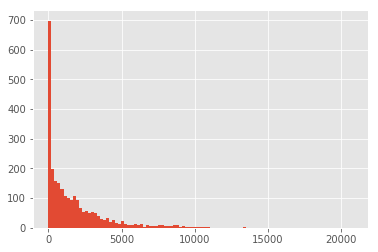

In [171]:
plt.hist(num_posts_by_class['exists'], bins=100);

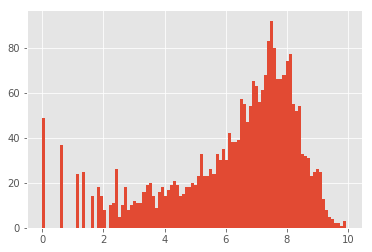

In [172]:
plt.hist(np.log(num_posts_by_class['exists']), bins=100);

KeyboardInterrupt: 

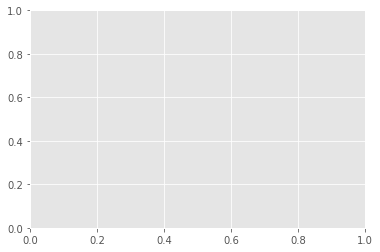

In [165]:
plt.hist(num_posts_by_class)

### Num posts in the last X days

In [162]:
last_month_posts_total[last_month_posts_total["exists_last_month_posts"]>0]

,id_num_posts_by_class,exists_num_posts_by_class,id_last_month_posts,date,picture_file_name,private,new_date,exists_last_month_posts
classroom_id,,,,,,,,
1,15613435281,20480,369.0,369.0,208.0,369.0,369.0,369.0
4,4002758976,1858,82.0,82.0,0.0,82.0,82.0,82.0
15,1564814461,2938,1.0,1.0,0.0,1.0,1.0,1.0
16,7093019051,7478,151.0,151.0,46.0,151.0,151.0,151.0
18,8842450227,9058,211.0,211.0,178.0,211.0,211.0,211.0


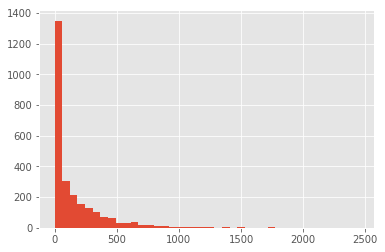

In [160]:
def posts_since(posts,date):
    last_month_posts = posts[posts['new_date']>date].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    plt.hist(last_month_posts_total['exists_last_month_posts'],bins=40)

def log_posts_since(posts,date):
    last_month_posts = posts[posts['new_date']>date].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    plt.hist(np.log(last_month_posts_total['exists_last_month_posts']+1),bins=40)
posts_since(posts, pd.to_datetime("Feb 15 2018"))

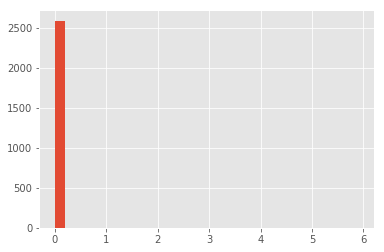

In [174]:
plt.hist(np.log(last_month_posts_total['exists_last_month_posts']+1),bins=30);

In [143]:
last_month_posts_total['exists_last_month_posts'].head(5)

classroom_id
1     369.0
3       0.0
4      82.0
15      1.0
16    151.0
Name: exists_last_month_posts, dtype: float64

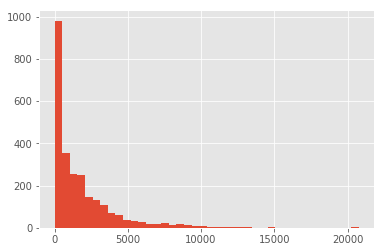

In [144]:
posts_since(posts, pd.to_datetime("Feb 15 2011"))

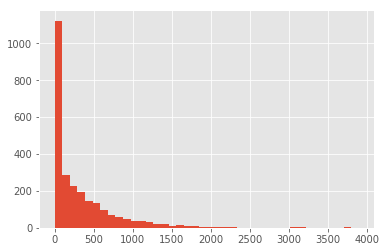

In [145]:
posts_since(posts, pd.to_datetime("Jan 15 2018"))

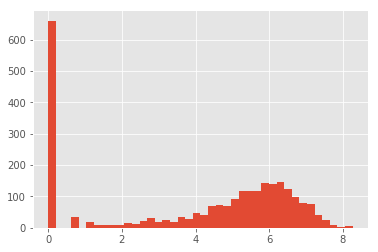

In [146]:
log_posts_since(posts, pd.to_datetime("jan 15 2018"))

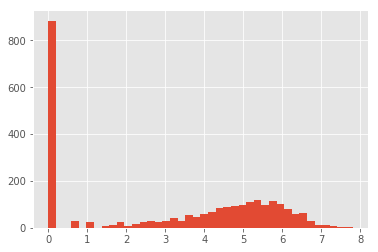

In [147]:
log_posts_since(posts, pd.to_datetime("feb 15 2018"))

In [76]:
sums_class_in_last_month = sum_post[sum_post['new_date']>pd.to_datetime("Feb 15 2018")].groupby('classroom_id').count()[:100]
sums_class_in_last_month.head(5)

,new_date,exists
classroom_id,,
1,22,22
4,16,16
15,1,1
16,15,15
18,17,17


### Num of days (in last month) with > 0 posts

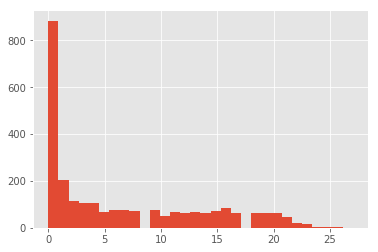

In [226]:
def days_with_one_post(posts, date):
    days_one_post_in_last_month = posts[posts['new_date']> date].groupby(['classroom_id','new_date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    plt.hist(days_one_post_in_last_month['exists_days_one_post_in_last_month'],bins=30);
    
def log_days_with_one_post(posts, date):
    days_one_post_in_last_month = posts[posts['new_date']> date].groupby(['classroom_id','new_date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    plt.hist(np.log(days_one_post_in_last_month['exists_days_one_post_in_last_month']+1),bins=30);
days_with_one_post(posts, pd.to_datetime("feb 15 2018"))

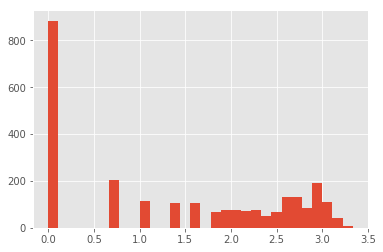

In [230]:
log_days_with_one_post(posts, pd.to_datetime("feb 15 2018"))

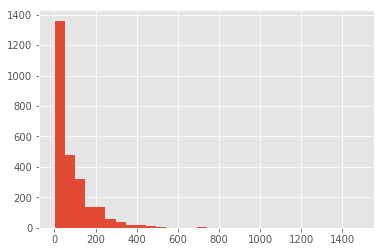

In [234]:
days_with_one_post(posts, pd.to_datetime("feb 15 2011"))

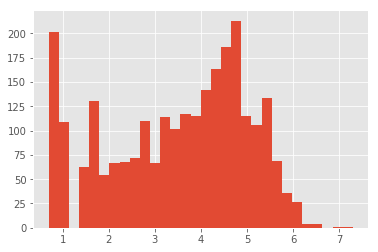

In [235]:
log_days_with_one_post(posts, pd.to_datetime("feb 15 2011"))